In [49]:
from finance_utils.asset.spot.base import Spot
from finance_utils.asset.spot.process import gbm
from finance_utils.trader.base import Trader
from matplotlib import pyplot

In [50]:
trader = Trader(1, "2024-1-1")

In [51]:
stock = Spot("10001", 100)
short_stock = Spot("10002", 100)

In [52]:
stock_pirce_list = gbm(100, 0.03/366, 0.02, "2024-1-1", "2025-1-1", "day", 1)

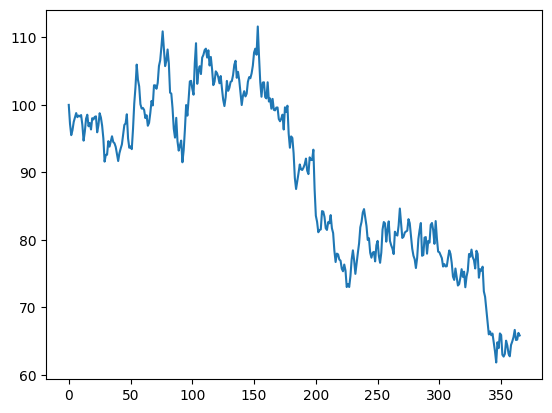

In [53]:
pyplot.plot(stock_pirce_list["price"])

In [54]:
pr_list = []
ir_list = []
cost_list = []
for i,t in enumerate(stock_pirce_list.time_stamp.data):
    p = stock_pirce_list["price"][i]
    pr = p/100
    ir = trader.net_worth_rate(
        **{"10001":{"price":p}}
    )
    pr_list.append(pr)
    ir_list.append(ir)
    if "10001" in trader.position.keys():
        cost_list.append(trader.position["10001"].holding_cost())
    else:
        cost_list.append(None)
    
    
        
    if t.day == 15:
        stock.be_purchased(trader, p, None, t)
        
    elif t.day == 1:
        trader.new_investment(100000, t)
    # elif t.day == t.last_day_in_month():
    #     stock.sell(trader, p, None, t)
        

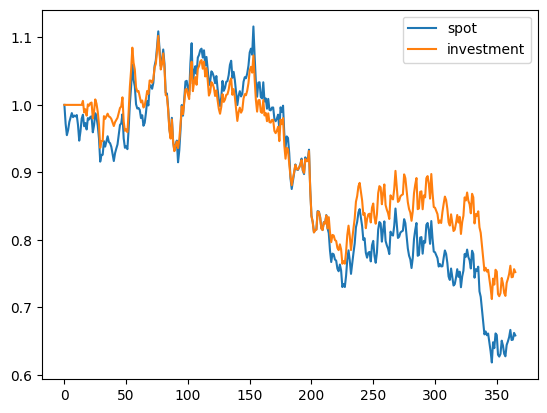

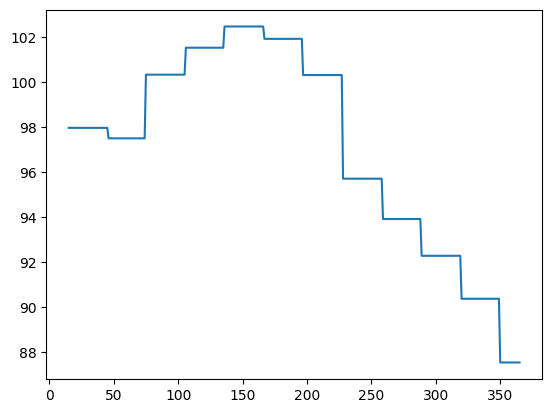

0.752363096304603


In [55]:
pyplot.plot(pr_list,label="spot")
pyplot.plot(ir_list, label="investment")
pyplot.legend()
pyplot.show()
pyplot.plot(cost_list,label="cost")
pyplot.show()
print(ir_list[-1])

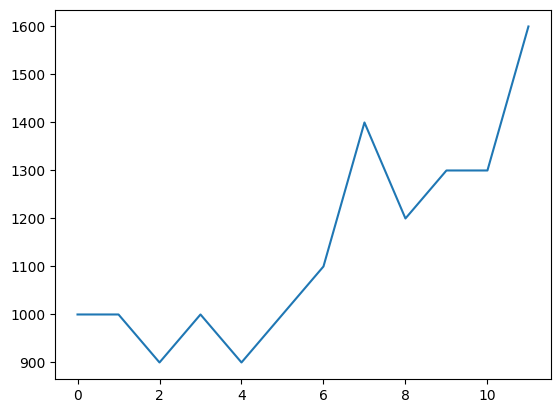

In [56]:
pyplot.plot([i.shares for i in trader.position["10001"].book])